# 1. Extract-Transform-Load (ETL)

In [74]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('./data/House_Rent_Dataset.csv')
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2.0,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1.0,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1.0,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1.0,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1.0,Contact Owner


In [75]:
df.shape #Return a tuple representing the dimensionality of the DataFrame.

(4746, 12)

In [76]:
df.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Posted On          4746 non-null   object 
 1   BHK                4746 non-null   int64  
 2   Rent               4746 non-null   int64  
 3   Size               4746 non-null   int64  
 4   Floor              4746 non-null   object 
 5   Area Type          4746 non-null   object 
 6   Area Locality      4746 non-null   object 
 7   City               4746 non-null   object 
 8   Furnishing Status  4746 non-null   object 
 9   Tenant Preferred   4746 non-null   object 
 10  Bathroom           4739 non-null   float64
 11  Point of Contact   4746 non-null   object 
dtypes: float64(1), int64(3), object(8)
memory usage: 445.1+ KB


# 2. Exploratory Data Analysis (EDA)

In [78]:
df.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4739.000000
mean,2.083860,3.499345e+04,967.490729,1.967293
std,0.832256,7.810641e+04,634.202328,0.884405
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [79]:
#converting Furnishing Status
df['Furnishing Status'].unique()

array(['Unfurnished', 'Semi-Furnished', 'Furnished'], dtype=object)

In [80]:
import pandas as pd

# Assuming df is your DataFrame
df['Furnishing Status'] = df['Furnishing Status'].map({'Unfurnished': 0, 'Semi-Furnished': 1, 'Furnished': 2})
df['Furnishing Status'].unique()

array([0, 1, 2])

In [81]:
# #or
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()

# df['Furnishing Status'] = le.fit_transform(df['Furnishing Status'])
# le.inverse_transform(np.array([0,1,2]))

# df['Furnishing Status'].unique()

In [82]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,0,Bachelors/Family,2.0,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,1,Bachelors/Family,1.0,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,1,Bachelors/Family,1.0,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,0,Bachelors/Family,1.0,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,0,Bachelors,1.0,Contact Owner


## One-Hot Encoding

In [83]:
#converting Furnishing Status
df['Tenant Preferred'].unique()

array(['Bachelors/Family', 'Bachelors', 'Family'], dtype=object)

In [92]:
# Assuming df is your DataFrame
df['Bachelors'] = df['Tenant Preferred'].apply(lambda x: 1 if 'Bachelors' in x else 0)
df['Family'] = df['Tenant Preferred'].apply(lambda x: 1 if 'Family' in x else 0)

In [93]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Tenant_Type,Bachelors,Family
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,0,Bachelors/Family,2.0,Contact Owner,Bachelors,1,1
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,1,Bachelors/Family,1.0,Contact Owner,Bachelors,1,1
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,1,Bachelors/Family,1.0,Contact Owner,Bachelors,1,1
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,0,Bachelors/Family,1.0,Contact Owner,Bachelors,1,1
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,0,Bachelors,1.0,Contact Owner,Bachelors,1,0


Rent is too high, must delete that row

In [10]:
#Drop some rows, having abnormal number like Rent 
#using fancy indexing
df[df['Rent']>1000000]

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
1001,2022-06-01,4,1200000,5000,4 out of 15,Carpet Area,Juhu,Mumbai,1,Bachelors/Family,4.0,Contact Agent
1837,2022-06-08,3,3500000,2500,4 out of 4,Carpet Area,Marathahalli,Bangalore,1,Bachelors,3.0,Contact Agent


In [11]:
np.where(df['Rent'] > 1000000)[0]

array([1001, 1837])

In [12]:
df.iloc[827]
#now you have to ask yourself, which ONE is wrong entry?
#relies on domain knowledge - so as a data scientist, you must know your business...

#whatever, i gonna delete 1001, 1837

Posted On                       2022-05-18
BHK                                      4
Rent                               1000000
Size                                  3064
Floor                         18 out of 45
Area Type                      Carpet Area
Area Locality        Raheja Artesia, Worli
City                                Mumbai
Furnishing Status                        1
Tenant Preferred                    Family
Bathroom                               4.0
Point of Contact             Contact Agent
Name: 827, dtype: object

In [13]:
(np.where(df['Rent']>1000000)[0]).tolist()
#np.where return indexes

[1001, 1837]

In [14]:
# to delete
# format: df.drop([indexes], axis=0, inplace=True
# axis = 0 means row, axis = 1 means columns
df.drop((np.where(df['Rent']>1000000)[0]).tolist(), axis=0, inplace=True)

In [15]:
df.shape

(4744, 12)

## 2.1 Univariate Analysis
- look at oen variavle
- main tools - countplot and displot
- countplot for discrete features
- displot for continuous features

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Area Type', ylabel='count'>

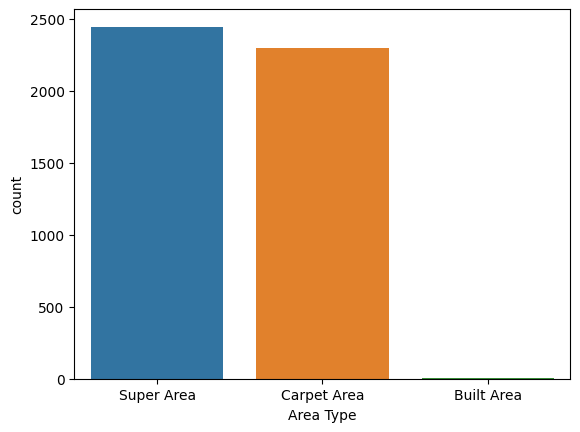

In [16]:
sns.countplot(x = df['Area Type'])

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Furnishing Status', ylabel='count'>

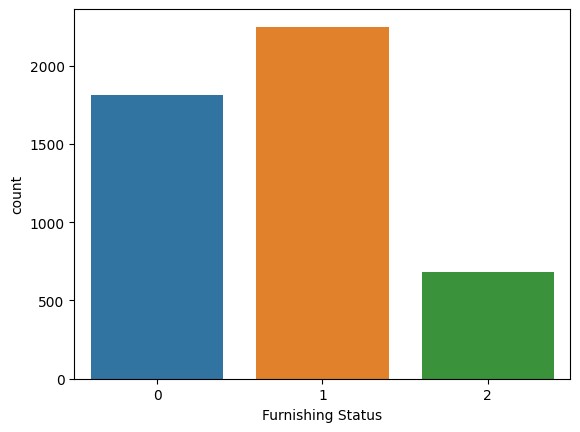

In [17]:
sns.countplot(x = df['Furnishing Status'])

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

<Axes: xlabel='Furnishing Status', ylabel='count'>

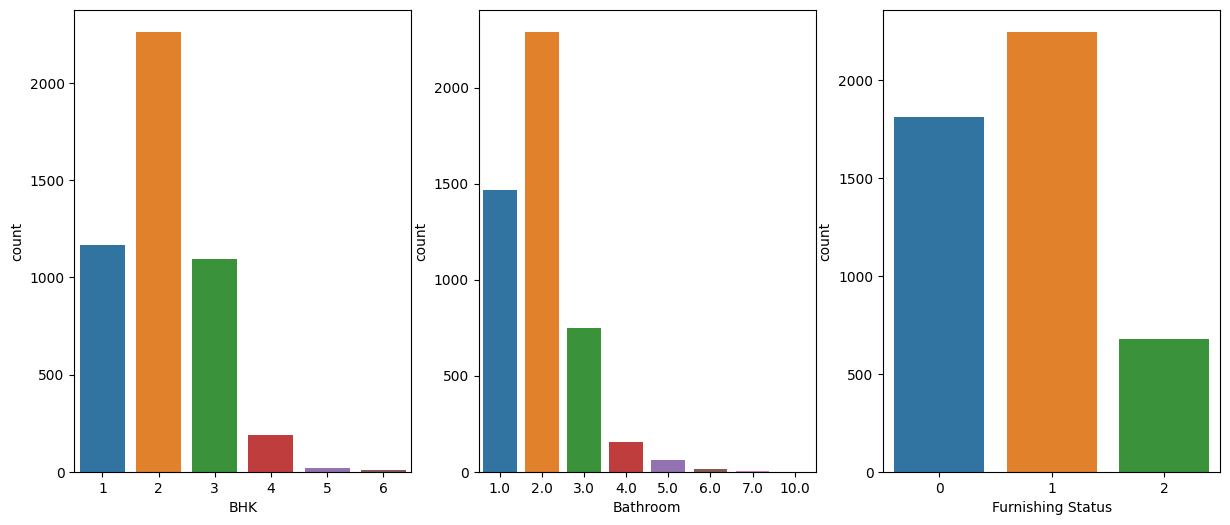

In [18]:
# Countplot or distplot ?

#1. we want to
#2. we want to

plt.figure(figsize=(20, 6))
plt.subplot(1, 4, 1)
sns.countplot(data=df,x='BHK')
plt.subplot(1, 4, 2)
sns.countplot(data=df,x='Bathroom')
plt.subplot(1, 4, 3)
sns.countplot(data=df,x='Furnishing Status')

/var/folders/yg/7zr68xws2x5d3vc4nhz2l7wc0000gn/T/ipykernel_28840/3416530824.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Size'])
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_a

<Axes: xlabel='Rent', ylabel='Density'>

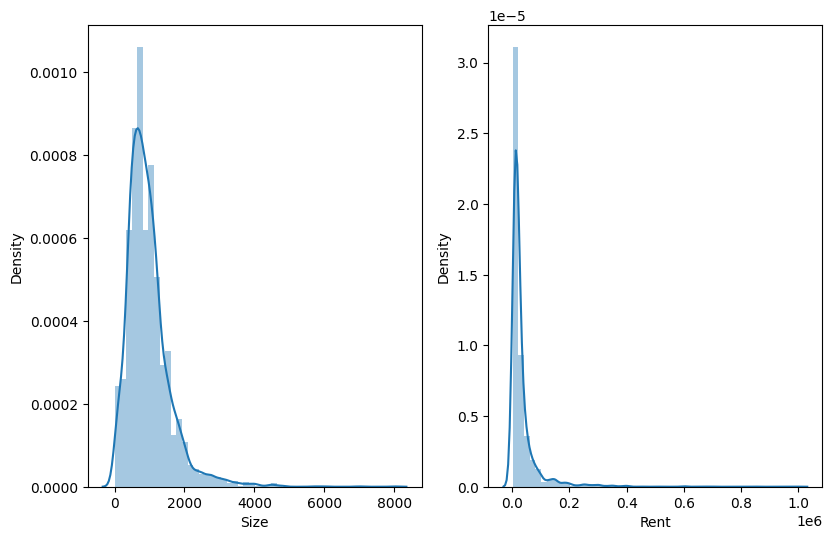

In [19]:
#let's displot 
#in this case Rent, theorentically can have 7500.2
#so Rent is considered Continuous
plt.figure(figsize=(25, 6))
plt.subplot(1, 5, 1)
sns.distplot(df['Size'])
plt.subplot(1, 5, 2)
sns.distplot(df['Rent'])

## 2.2 Multivariate analysis

- look at two featuress/labels at the same time
- e.g., see how bathroomms affect Rent -> bivaraint analysis
- e.g., see hwo size affect Rent
- usually, y is label and x is any giben feature
- Goal: which factor/features are somwhow related tomy label, i.e., Rent
- boxplot : for discrete vs continuous features
- scatterplot : for continuous vs continuous features

In [20]:
df.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [21]:
#if i want to be see whether bathroom is related to Rent
#which plot to use?
df['Bathroom'].unique()
#theoretically, there is no 0.1 bathroom, so bathroom is doscrete
#since Rent is discrete
#so we use boxplot

array([ 2.,  1., nan,  3.,  5.,  4.,  6.,  7., 10.])

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Bathroom', ylabel='Rent'>

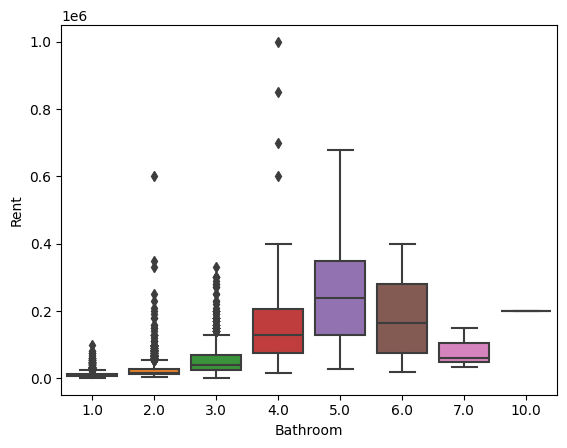

In [22]:
#for seasoned padawan, try boxenplot
# sns.boxenplot(x = df['Bathroom'], y= df['Rent'])
sns.boxplot(x = df['Bathroom'], y= df['Rent'])

#is there any relation between bathroom and Rent
#Note 2: Bathroom is good features

In [23]:
df['City'].value_counts()

City
Mumbai       971
Chennai      891
Bangalore    885
Hyderabad    868
Delhi        605
Kolkata      524
Name: count, dtype: int64

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='City', ylabel='Rent'>

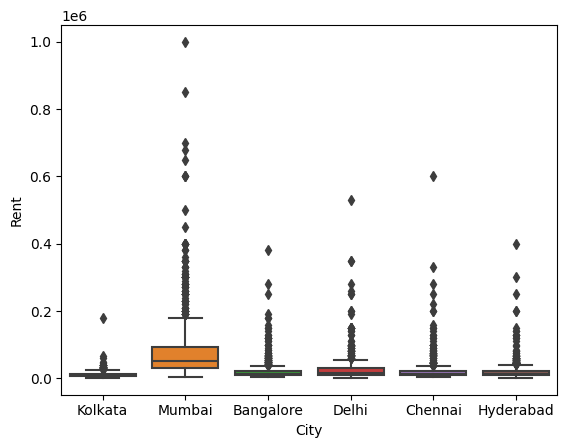

In [24]:
# I am interested whether city affects Rent
sns.boxplot(x = df['City'], y= df['Rent'])

#Note2 : if you want to use City as feature you may want to convert 
#Mumbai and non-Mumbai

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Size', ylabel='Rent'>

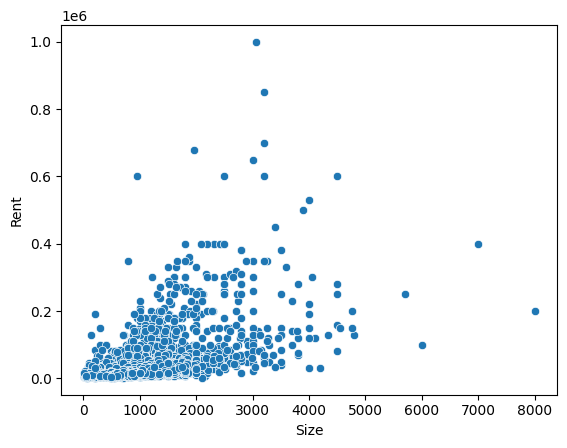

In [25]:
#thereotically, size can be decimals, so size is continuous
#so I want to know wheteher size affects Rent  
#scatterplot or boxplot?
sns.scatterplot(x = df['Size'], y=df['Rent'])

In [26]:
#since this is tricky, maybe let's try heatmap
sns.heatmap(df.corr(), annot =True)
#note that this is only between continuous values

ValueError: could not convert string to float: '2022-05-18'

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(966.3176644182125, 850.0, 631.2346642955634)

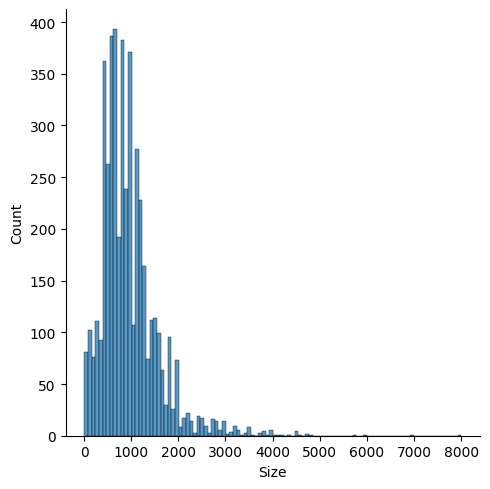

In [27]:
sns.displot(df.Size)
df['Size'].mean(),df['Size'].median(),df['Size'].std()

In [ ]:
# one more thing you have to be care ful
# if two features (NOT labels) have very high correlation, beware
# features MUST NOT have high correlational, we always assume they are independent
# if you have two very correlated features, you will fool the model

#summary: size, bathroom, bhk - let's say these are best three
#but beware: chaky did not comprehensively look at the data

#let's try create new column called categorical_size
#which 1 mean small, 2 means medium, 3 mean big
#yhis is just for exercise
#it's very common in data science so I want to practice

In [28]:
firstpivot = df.Size.median() - df.Size.std()
firstpivot
#the reason why I minus std is basically following basic distribtuion rule
#the reason why I use median() is because my dist is not normal

218.76533570443655

In [29]:
secodnpivot = df.Size.median() + df.Size.std()
secodnpivot

1481.2346642955636

In [30]:
#So I want to make three groups
#Group 1: < 218.75
cond1 = df.Size < firstpivot #basically a list of True and False (can be used to select indexes) 

#Group 2: 218.76 to 1481.234
cond2 = (df.Size >= firstpivot) & (df.Size <= secodnpivot)

#Group 3: > 1481.234
cond3 = df.Size > secodnpivot

In [31]:
#set all row meeting 
#cond1 to 1 
#cond2 to 2
#cond3 to 3
#format: df.col[cond1] = 1
# df.cat_size = 1 cannot use because u don't have distribution yet

df['cat_size'] = 1

In [32]:
# df.cat_size[cond1] = 1
# df.cat_size[cond2] = 2
# df.cat_size[cond3] = 3

#format : df.loc[masking indexes, column] 
df.loc[cond1, 'cat_size'] = 1
df.loc[cond2, 'cat_size'] = 2
df.loc[cond3, 'cat_size'] = 3

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='cat_size', ylabel='Rent'>

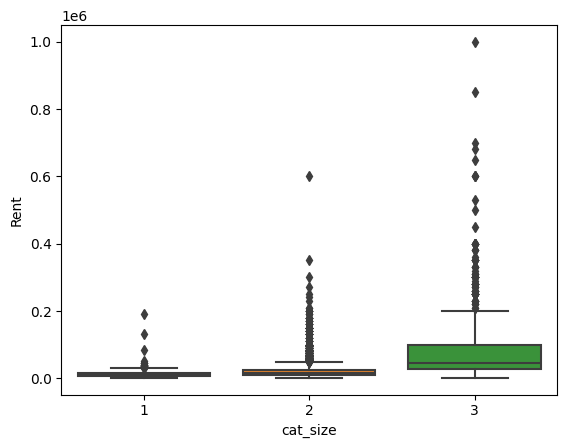

In [33]:
#try to plot and see whether categorical size has an effect with Rent

#which plot i use: boxplot or scatterplot?

sns.boxplot(x = df['cat_size'], y = df['Rent'])

#the concept in which we create new features using existing features
#are called "feature engineering"

#maybe the idea is try to separate the category even more
#very small, small, medium, big, very big

#conclusion: i hope that using the continuous Size, can be better
#if my model is smart

In [34]:
#you need to convert this to integers for machine learning
#1. label encoding 
#2. one-hot encoding

#since we have three categories, we gonna use one-hot encoding
#pd.get_dummies
#   it will take the value, and use it as column

#last time, the command you use is LabelEncoder()
#conclusion of EDA:
#1. we remove some outliers from Rent
#2. we found bathroom, size, and bhk to be promising features
#3. we learn how to group and perform feature engineering

# 3. Feature Extraction / Selection

- you have to now select your X and y
- once you select, please do train_test_split

Note : the reason why I do features extraction before preprocessing , is to preventing data leakage

In [35]:
df.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact', 'cat_size'],
      dtype='object')

In [36]:
X =  df[['Size','Bathroom','BHK']] #if not, you will NOT get a shapre of (m,n)
y = df[['Rent']] #shape must be (m,)

#this is to make sure my X is shape(m,n)
#where m is number of rows
#and n is the number of columns
assert X.shape[0] > 0
assert X.shape[1] > 0

assert y.shape[0] > 0
# assert y.ndim == 1

from sklearn.model_selection import train_test_split

#random state: you can choose wether number you wanr
#but this will ensure toda or tomorrow, you will ALWAYS get the same split
#for the same random state
#so we can compare our results

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=999)

In [37]:
#Please check the shape of X_train,X_test,y_train,y_test 
X_train.shape, X_test.shape , y_train.shape, y_test.shape

((3320, 3), (1424, 3), (3320, 1), (1424, 1))

In [38]:
#one last thing to do, e.g., ensure no datatype "object"
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3320 entries, 4292 to 4446
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Size      3320 non-null   int64  
 1   Bathroom  3316 non-null   float64
 2   BHK       3320 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 103.8 KB


In [39]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3320 entries, 4292 to 4446
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Rent    3320 non-null   int64
dtypes: int64(1)
memory usage: 51.9 KB
